<a href="https://colab.research.google.com/github/tikendraw/NLP/blob/main/nltk_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF

*TF-IDF or ( Term Frequency(TF) — Inverse Dense Frequency(IDF) )is a technique which is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

**IDF =Log[(# Number of documents) / (Number of documents containing the word)]**

***TF = (Number of repetitions of word in a document) / (# of words in a document)***

In [3]:
import nltk
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [5]:
story = '''Confusion and chaos lifted. All was still and clear in his mind. Only hours earlier he was filled with misery, 
self-loathing and desperation. But now the lycanthropic curse had taken control, freed from its chains and eager to make up for lost time.

Jagged claws easily removed the clothes from his body. He would have no more use for them. He had emerged beside a small, 
shallow river which was painted silver under the clear sky. It was cold, the dead of winter, and his breath misted before his eyes.
 The weather did not bother him. This body was made for endurance.

His long, wiry limbs held easy strength. He felt a buzzing run through his whole body. 
An electrically charged energy that needed to be unleashed.
 His magnified senses announced the presence of all living creatures within running distance. None could defy him, 
 none could oppose him. All would flee before him. But it would make no difference. This night would be coloured in blood.

He threw back his head and let out a howl of hysteria, elation and fervour. 
The night belonged to him. The full moon was risen and the chase was on.'''

In [37]:
len(story)

1112

# Clean the textual data

In [51]:
# sentence tokenize
import regex as re
sentences = nltk.sent_tokenize(story)
print(len(sentences))
corpus = []

for i in range(len(sentences)):
  words = re.sub('[^a-zA-Z]', ' ', sentences[i])
  words = words.lower()
  words = words.split()
  # print(words)
  words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords]
  # print('after', words)
  words = ' '.join(words)
  # print('appendd',[words])

  corpus.append(words)

  


21


In [24]:
words = re.sub('[^a-zA-Z]', ' ', sentences[0])
words = words.lower()

words=words.split()
words

['confusion', 'and', 'chaos', 'lifted']

In [52]:
corpus

['confusion chaos lifted',
 'still clear mind',
 'hour earlier filled misery self loathing desperation',
 'lycanthropic curse taken control freed chain eager make lost time',
 'jagged claw easily removed clothes body',
 'would use',
 'emerged beside small shallow river painted silver clear sky',
 'cold dead winter breath misted eye',
 'weather bother',
 'body made endurance',
 'long wiry limb held easy strength',
 'felt buzzing run whole body',
 'electrically charged energy needed unleashed',
 'magnified sens announced presence living creature within running distance',
 'none could defy none could oppose',
 'would flee',
 'would make difference',
 'night would coloured blood',
 'threw back head let howl hysteria elation fervour',
 'night belonged',
 'full moon risen chase']

# Let's TF_IDF it

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [53]:
vec = tf.fit_transform(corpus)

In [54]:
vec.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.35355339, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.75046347, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [60]:
vec_df = pd.DataFrame(vec.toarray())

In [61]:
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.528612,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600237,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319837,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.319837,0.000000,0.000000,0.319837,0.000000,0.000000,0.000000,0.000000,0.000000,0.319837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.319837,0.319837,0.000000,0.000000,0.281671,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319837,0.000000,0.319837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.335369,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.421314,0.000000,0.421314,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421314,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

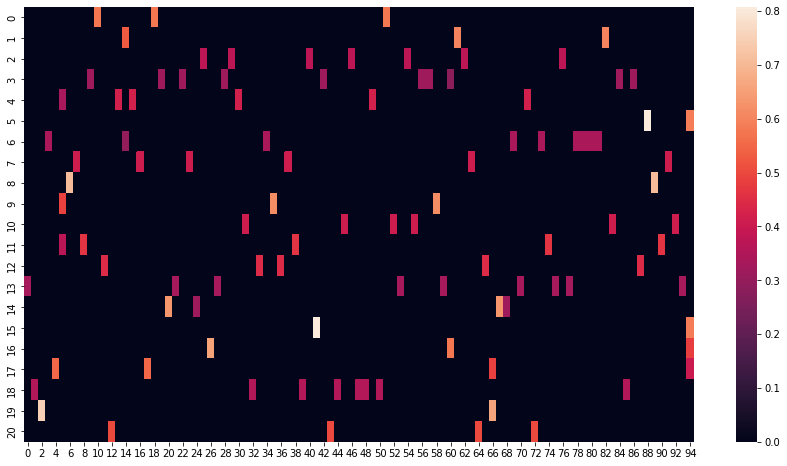

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
sns.heatmap(vec_df)
plt.show()